In [1]:
%matplotlib notebook
%config IPCompleter.greedy=True

ModuleNotFoundError: No module named 'matplotlib'

# pyRVEA

The python implimentation of reference vector guided evolutionary algorithm.

See the details of RVEA in the following paper:

R. Cheng, Y. Jin, M. Olhofer and B. Sendhoff, A Reference Vector Guided Evolutionary Algorithm for Many-objective Optimization, IEEE Transactions on Evolutionary Computation, 2016

The source code of pyRVEA is implemented by Bhupinder Saini

If you have any questions about the code, please contact:

Bhupinder Saini: bhupinder.s.saini@jyu.fi

Project researcher at University of Jyväskylä.

In [2]:
from allclasses import Problem, Parameters, Population  # Necessary imports
from allclasses import testProblem
from optproblems import dtlz  # Imported for examples

### Create the Problem object

To begin, first create a Problem object. You can use the class TestProblems to use the inbuilt problems, or create your own class by inheriting via the Problem class.

This object contains the following details of the problem:
    
- `Problem.name` - Contains the name of the problem
- `Problem.num_of_variables` - Contains the number of decision variables
- `Problem.num_of_objectives` - Contains the number of objective variables
- `Problem.num_of_constraints` - Contains the number of constraints
- `Problem.lower_limits` - Scalar/list of lower limits of decision variables
- `Problem.upper_limits` - Scalar/list of upper limits of decision variables
- `Problem.objectives()` - Accepts a single sample and returns the corresponding objective values in a list
- `Problem.constraints()` - Accepts a single sample and returns the corresponding constraint violations in a list

In [3]:
k = 10
numobj = 3
numconst = 0
numvar = numobj + k - 1
problem = testProblem(name='DTLZ3', num_of_variables=numvar, num_of_objectives=numobj, num_of_constraints=numconst)

### Create the Parameters object

This object contains the parameters of RVEA evolution: 
- `population_size` - The size of population
- `lattice_resolution` - Resolution of the reference vector lattice. Equivalent to number of divisions along a dimension.
- `generations` - The number of generations for which RVEA conducts the mating and selection in the population.
- `iterations` - The number of times an "interruption" in the evolution happens. This interruption can be one or more of:
    - Reference Vector Adaptation
    - Interaction with the DM
    - Updating Surrogate models
- `Alpha` - The alpha parameter of APD.
- `ploton` - Boolean value. If true, plots are generated whenever "interruptions" occur.

In [4]:
parameters = Parameters(population_size=105, lattice_resolution=13 , algorithm_name='RVEA')

### Create the population object
This object contains the population. This object contains many variables and methods, a few are described below:
- `Population.individuals` - An array containing the decision variable values of the entire population.
- `Population.objectives` - An array containing the objective variable values of the entire population.
- `Population.constraint_violation` - An array containing the constraint violation values of the entire population.
- `Population.fitness` - Array containing fitness value of all individuals.
- `Population.non_dom` - Array containing the objective values of non-dominated individuals.

In [5]:
pop = Population(problem, parameters, assign_type='RandomAssign')  # Current options: 'RandomAssign' and 'LHSDesign'

Evolution can be conducting by calling `evolve()` on the population object.

<IPython.core.display.Javascript object>


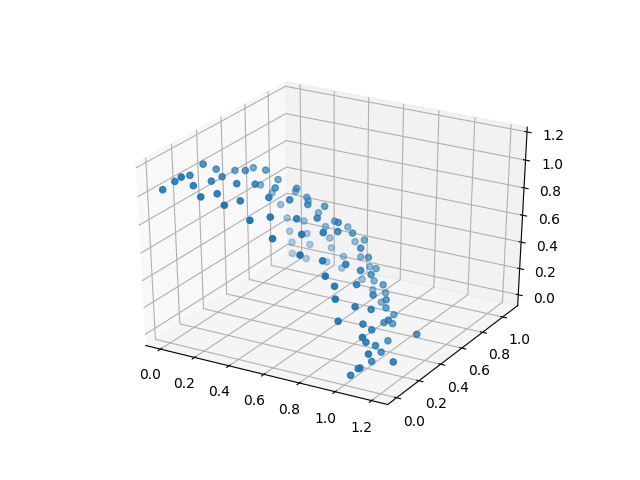

KeyboardInterrupt: 

In [6]:
newpop = pop.evolve(problem, parameters)

Calling `non_dominated()` on population object updated `Population.non_dom` and returns a tuple containing the output of `pygmo.fast_non_dominated_sorting`. 

Calling `hypervolume()` on a population object calculates the hypervolume based on the non-dominated individuals and passed reference point.

In [13]:
newpop.non_dominated()
refpoint = 2
volume = 2 ** numobj
print(newpop.hypervolume(refpoint)/volume)

0.7461053906907054


### Creating a custom Problem object
To create a custom `Problem` object, inherit from the `Problem` class and overwrite the `objective()` method to accept a sample and return the objective values as a list/array. Overwrite `constraints()` method if the problem has constraints other than the upper and lower limits of the decision variables. Then initialize the newly created object class using the same format as the `testProblem` class.

In [ ]:
class newProblem(Problem):
    def objectives(self, decision_variables):
        return(dtlz.DTLZ3(3,12)(decision_variables))

In [ ]:
name = 'newDTLZ3'
k = 10
numobj = 3
numvar = numobj + k - 1
new_problem = newProblem(name='newDTLZ3', lower_limits=0, upper_limits=1, num_of_variables=numvar, num_of_objectives=numobj)

In [ ]:
parameters = Parameters(population_size=105, lattice_resolution=13 , algorithm_name='RVEA')
pop = Population(new_problem, parameters)

In [ ]:
newpop = pop.evolve(problem, parameters)

In [ ]:
newpop.non_dominated()
refpoint = 2
volume = 2 ** numobj
print(newpop.hypervolume(refpoint)/volume)